In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, SelectFpr
import operator
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import math

print('Imports complete.')

Imports complete.


In [ ]:
path = '/content/drive/MyDrive/cleaneddata.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Flow ID,Source Port,Destination Port,Timestamp,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Packets/s,Max Packet Length,Packet Length Mean,Packet Length Std,URG Flag Count,CWE Flag Count,ECE Flag Count,Avg Fwd Segment Size,Fwd Header Length.1,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.2.174-10.42.0.211-443-51023-6,51023,443,16/06/2017 03:55:47,151054,1076,4575,179.333333,321.621931,571.875000,679.532284,37410.462480,92.682087,11619.53846,14541.15588,49105,24,101887,20377.4,12821.55074,30425,111,128516,18359.42857,24038.55786,54822,24,200.0,52.961193,0,1418,1,0,0,1,179.333333,6,1076,8,4575,353,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,172.217.2.174-10.42.0.211-443-51023-6,51023,443,16/06/2017 03:55:47,349,23,0,11.500000,16.263456,0.000000,0.000000,65902.578800,5730.659026,349.00000,0.00000,349,349,349,349.0,0.00000,349,349,0,0.00000,0.00000,0,0,64.0,0.000000,0,23,0,1,0,0,11.500000,2,23,0,0,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,172.217.12.174-10.42.0.211-443-34259-6,34259,443,16/06/2017 03:55:52,119,23,0,11.500000,16.263456,0.000000,0.000000,193277.310900,16806.722690,119.00000,0.00000,119,119,119,119.0,0.00000,119,119,0,0.00000,0.00000,0,0,64.0,0.000000,0,23,0,1,0,0,11.500000,2,23,0,0,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,172.217.10.74-10.42.0.211-443-55509-6,55509,443,16/06/2017 03:55:53,37055,31,0,31.000000,0.000000,0.000000,0.000000,836.594252,53.973823,37055.00000,0.00000,37055,37055,0,0.0,0.00000,0,0,0,0.00000,0.00000,0,0,32.0,26.986911,0,31,0,1,0,1,31.000000,1,31,1,0,391,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,172.217.2.174-10.42.0.211-443-44852-6,44852,443,16/06/2017 03:55:58,178727,1313,307,218.833333,331.306152,43.857143,75.366722,9064.103353,72.736632,14893.91667,18532.64075,62243,55,125550,25110.0,28468.23202,70464,172,156011,26001.83333,24955.90182,67743,55,200.0,39.165879,0,753,1,0,0,1,218.833333,6,1313,7,307,352,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.tail()

,Flow ID,Source Port,Destination Port,Timestamp,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Packets/s,Max Packet Length,Packet Length Mean,Packet Length Std,URG Flag Count,CWE Flag Count,ECE Flag Count,Avg Fwd Segment Size,Fwd Header Length.1,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1048570,10.42.0.1-10.42.0.42-53-52113-17,52113,53,28/08/2017 03:29:57,377347,44,194,44.0,0.000000,194.0,0.0,630.719205,5.300161,377347.00,0.00,377347,377347,0,0.00,0.00,0,0,0,0.0,0.0,0,0,40.0,2.650081,44,194,0,0,0,1,44.0,1,44,1,194,-1,0,40,0.0,0.0,0,0,0.0,0.0,0,0,RANSOMWARE_SVPENG
1048571,180.149.153.68-10.42.0.42-80-57160-6,80,57160,28/08/2017 04:10:18,2261,0,0,0.0,0.000000,0.0,0.0,0.000000,884.564352,2261.00,0.00,2261,2261,0,0.00,0.00,0,0,0,0.0,0.0,0,0,32.0,442.282176,0,0,0,1,1,1,0.0,1,0,1,0,1369,0,32,0.0,0.0,0,0,0.0,0.0,0,0,RANSOMWARE_SVPENG
1048572,10.42.0.1-10.42.0.42-53-17292-17,17292,53,28/08/2017 04:13:40,840872,32,207,32.0,0.000000,207.0,0.0,284.228753,2.378483,840872.00,0.00,840872,840872,0,0.00,0.00,0,0,0,0.0,0.0,0,0,40.0,1.189242,32,207,0,0,0,1,32.0,1,32,1,207,-1,0,40,0.0,0.0,0,0,0.0,0.0,0,0,RANSOMWARE_SVPENG
1048573,10.42.0.42-120.132.42.172-44600-80-6,80,44600,28/08/2017 04:08:08,2394,0,0,0.0,0.000000,0.0,0.0,0.000000,835.421888,2394.00,0.00,2394,2394,0,0.00,0.00,0,0,0,0.0,0.0,0,0,32.0,417.710944,0,0,0,1,1,1,0.0,1,0,1,0,1369,0,32,0.0,0.0,0,0,0.0,0.0,0,0,RANSOMWARE_SVPENG
1048574,204.13.194.242-10.42.0.42-443-42974-6,42974,443,28/08/2017 03:34:09,114924911,62,0,15.5,17.897858,0.0,0.0,0.539483,0.034805,38308303.67,66316512.47,114884013,938,114924911,38308303.67,66316512.47,114884013,938,0,0.0,0.0,0,0,80.0,0.000000,0,31,0,1,1,0,15.5,4,62,0,0,-1,1,20,39960.0,0.0,39960,39960,114884013.0,0.0,114884013,114884013,RANSOMWARE_SVPENG


In [ ]:
df['Label'].value_counts()

BENIGN                   410548
RANSOMWARE               348943
RANSOMWARE_PORNDROID      46082
RANSOMWARE_KOLER          44555
RANSOMWARE_RANSOMBO       39859
RANSOMWARE_CHARGER        39551
RANSOMWARE_SIMPLOCKER     36340
RANSOMWARE_SVPENG         27003
RANSOMWARE_JISUT          25672
RANSOMWARE_LOCKERPIN      25307
RANSOMWARE_PLETOR          4715
Name: Label, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 52 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow ID                      1048575 non-null  object 
 1   Source Port                  1048575 non-null  int64  
 2   Destination Port             1048575 non-null  int64  
 3   Timestamp                    1048575 non-null  object 
 4   Flow Duration                1048575 non-null  int64  
 5   Total Length of Fwd Packets  1048575 non-null  int64  
 6   Total Length of Bwd Packets  1048575 non-null  int64  
 7   Fwd Packet Length Mean       1048575 non-null  float64
 8   Fwd Packet Length Std        1048575 non-null  float64
 9   Bwd Packet Length Max        1048575 non-null  float64
 10  Bwd Packet Length Std        1048575 non-null  float64
 11  Flow Bytes/s                 1048575 non-null  float64
 12  Flow Packets/s               1048575 non-n

In [ ]:
df.columns

Index(['Flow ID', 'Source Port', 'Destination Port', 'Timestamp',
       'Flow Duration', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd Packets/s', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'URG Flag Count', 'CWE Flag Count',
       'ECE Flag Count', 'Avg Fwd Segment Size', 'Fwd Header Length.1',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'min_seg_size_forward', 'Active Mean',
       'Active Std', 'Active Max', 'Active Min', 'Idle M

In [ ]:
dep_var = 'Label'
df[dep_var].value_counts()

BENIGN                   410548
RANSOMWARE               348943
RANSOMWARE_PORNDROID      46082
RANSOMWARE_KOLER          44555
RANSOMWARE_RANSOMBO       39859
RANSOMWARE_CHARGER        39551
RANSOMWARE_SIMPLOCKER     36340
RANSOMWARE_SVPENG         27003
RANSOMWARE_JISUT          25672
RANSOMWARE_LOCKERPIN      25307
RANSOMWARE_PLETOR          4715
Name: Label, dtype: int64

In [ ]:
y = df[dep_var]
del df[dep_var]
#X = (df - df.mean()) / (df.max() - df.min())
X = df
z=df.size
print(X.shape)

(1048575, 51)


In [ ]:
valid_cols = ['Flow ID', 'Source IP', 'Source Port',
       'Destination IP', 'Destination Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label']
for col in X.columns:
    #print(X[col].dtype)
    if X[col].dtype == 'object' or col not in valid_cols:
        del X[col]
        #print('dropped')

In [ ]:
print(X.shape)
X1=X.copy()
X2=X.copy()

(1048575, 49)


In [ ]:
df1=df.copy()
df2=df.copy()

In [ ]:
# Technique from https://machinelearningmastery.com/feature-selection-machine-learning-python/
# feature extraction
test = SelectFpr(score_func=f_classif, alpha=0.05)
fit = test.fit(X, y)
# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
dictt = []
i=0
for col in X.columns:
    score = fit.scores_[i]
    #print(score)
    i+=1
    if not math.isnan(float(score)):
        dictt.append([col, score])    
    
#dictt = sorted(dictt, key=operator.itemgetter(1), reverse=True)
dictt.sort(key=lambda arr : float(arr[1]), reverse=True)

outstr = ''

i=1
for col, score in dictt[:20]:
    #if not math.isnan(float(score)):
    print('{}\t{}\t{}'.format(i, col, score))
    i+=1
    
    outstr += '\'' + col + '\', '

print(outstr)


1	Active Max	677.6000614382294
2	Destination Port	617.1654480819002
3	Active Std	531.3617253049655
4	Active Mean	487.7271720509815
5	Init_Win_bytes_backward	466.4327605491759
6	URG Flag Count	446.0371823679936
7	Total Length of Fwd Packets	406.4139291026289
8	Fwd Header Length.1	406.4139291026289
9	Source Port	397.7716672219904
10	Flow IAT Mean	370.94468404250125
11	Flow IAT Min	289.4728599246458
12	Fwd IAT Total	287.69516928161494
13	Active Min	275.8639691756266
14	Fwd IAT Max	244.84775107860798
15	Fwd IAT Mean	243.04861113906384
16	Packet Length Std	242.16766421699666
17	Fwd IAT Min	225.10398521933095
18	Fwd IAT Std	212.62156667885895
19	Avg Fwd Segment Size	210.57948357778236
20	Flow IAT Max	207.23978764730646
'Active Max', 'Destination Port', 'Active Std', 'Active Mean', 'Init_Win_bytes_backward', 'URG Flag Count', 'Total Length of Fwd Packets', 'Fwd Header Length.1', 'Source Port', 'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Total', 'Active Min', 'Fwd IAT Max', 'Fwd IAT Mean', 'Pack

In [ ]:
cols_to_keep = ['Active Max', 'Destination Port', 'Active Std', 'Active Mean', 'Init_Win_bytes_backward', 'URG Flag Count', 'Total Length of Fwd Packets', 'Fwd Header Length.1', 'Source Port', 'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Total', 'Active Min', 'Fwd IAT Max', 'Fwd IAT Mean', 'Packet Length Std', 'Fwd IAT Min', 'Fwd IAT Std', 'Avg Fwd Segment Size', 'Flow IAT Max',
                    'Label']
print('Dropping unnecessary columns...')
df.drop(columns=[col for col in df.columns if col not in cols_to_keep], inplace=True, errors='raise') 
df.dropna(inplace=True)


Dropping unnecessary columns...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Source Port                  1048575 non-null  int64  
 1   Destination Port             1048575 non-null  int64  
 2   Total Length of Fwd Packets  1048575 non-null  int64  
 3   Flow IAT Mean                1048575 non-null  float64
 4   Flow IAT Max                 1048575 non-null  int64  
 5   Flow IAT Min                 1048575 non-null  int64  
 6   Fwd IAT Total                1048575 non-null  int64  
 7   Fwd IAT Mean                 1048575 non-null  float64
 8   Fwd IAT Std                  1048575 non-null  float64
 9   Fwd IAT Max                  1048575 non-null  int64  
 10  Fwd IAT Min                  1048575 non-null  int64  
 11  Packet Length Std            1048575 non-null  int64  
 12  URG Flag Count               1048575 non-n

In [ ]:
print(X.shape)
print(y.shape)

(1048575, 20)
(1048575,)


[[33123  7916     0     0     0     0    16     0     0     0     0]
 [24198 10686     0     0     0     0    11     0     0     0     0]
 [ 2640  1314     0     0     0     0     1     0     0     0     0]
 [ 1763   804     0     0     0     0     0     0     0     0     0]
 [ 2919  1535     0     0     0     0     1     0     0     0     0]
 [ 1638   893     0     0     0     0     0     0     0     0     0]
 [  347   123     0     0     0     0     2     0     0     0     0]
 [ 3298  1308     0     0     0     0     2     0     0     0     0]
 [ 3130   851     0     0     0     0     5     0     0     0     0]
 [ 2821   809     0     0     0     0     4     0     0     0     0]
 [ 1502  1196     0     0     0     0     2     0     0     0     0]]


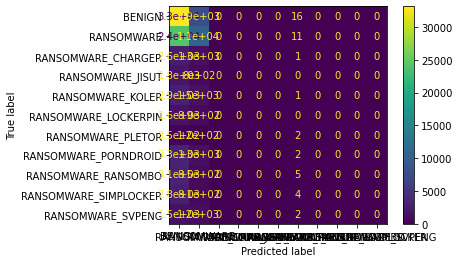

[[33796  7257     0     0     0     0     2     0     0     0     0]
 [25474  9394     0     0     0     0    26     0     0     0     0]
 [ 2775  1179     0     0     0     0     2     0     0     0     0]
 [ 1940   623     0     0     0     0     4     0     0     0     0]
 [ 3086  1368     0     0     0     0     1     0     0     0     0]
 [ 1778   749     0     0     0     0     4     0     0     0     0]
 [  339   122     0     0     0     0    10     0     0     0     0]
 [ 3268  1338     0     0     0     0     3     0     0     0     0]
 [ 2994   991     0     0     0     0     1     0     0     0     0]
 [ 2782   851     0     0     0     0     1     0     0     0     0]
 [ 1997   699     0     0     0     0     4     0     0     0     0]]


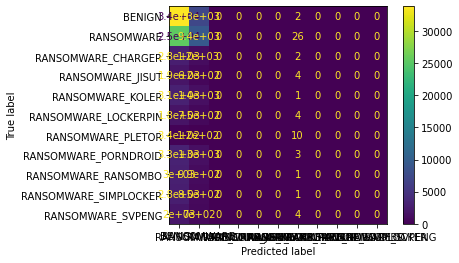

[[32425  8625     0     0     0     0     5     0     0     0     0]
 [22832 12056     0     0     0     0     6     0     0     0     0]
 [ 2815  1138     0     0     0     0     2     0     0     0     0]
 [ 1910   657     0     0     0     0     1     0     0     0     0]
 [ 3013  1441     0     0     0     0     1     0     0     0     0]
 [ 1475  1054     0     0     0     0     2     0     0     0     0]
 [  345   124     0     0     0     0     2     0     0     0     0]
 [ 3080  1528     0     0     0     0     1     0     0     0     0]
 [ 2979  1005     0     0     0     0     1     0     0     0     0]
 [ 2687   943     0     0     0     0     4     0     0     0     0]
 [ 1746   953     0     0     0     0     2     0     0     0     0]]


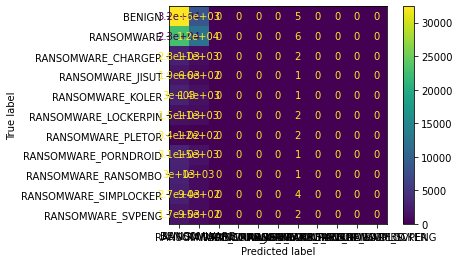

[[32416  8638     0     0     0     0     1     0     0     0     0]
 [23400 11320     0     0     0     0   174     0     0     0     0]
 [ 2696  1256     0     0     0     0     3     0     0     0     0]
 [ 1893   673     0     0     0     0     2     0     0     0     0]
 [ 3030  1420     0     0     0     0     5     0     0     0     0]
 [ 1640   890     0     0     0     0     1     0     0     0     0]
 [  316   136     0     0     0     0    19     0     0     0     0]
 [ 3141  1465     0     0     0     0     2     0     0     0     0]
 [ 3115   868     0     0     0     0     3     0     0     0     0]
 [ 2710   922     0     0     0     0     2     0     0     0     0]
 [ 1940   758     0     0     0     0     3     0     0     0     0]]


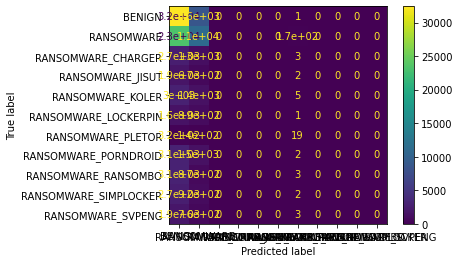

[[31647  9392     0     0     0     0    16     0     0     0     0]
 [24522 10360     0     0     0     0    12     0     0     0     0]
 [ 2773  1180     0     0     0     0     2     0     0     0     0]
 [ 1775   789     0     0     0     0     3     0     0     0     0]
 [ 2908  1547     0     0     0     0     1     0     0     0     0]
 [ 1653   876     0     0     0     0     2     0     0     0     0]
 [  330   134     0     0     0     0     7     0     0     0     0]
 [ 3271  1336     0     0     0     0     1     0     0     0     0]
 [ 3065   918     0     0     0     0     3     0     0     0     0]
 [ 2815   819     0     0     0     0     0     0     0     0     0]
 [ 1946   753     0     0     0     0     2     0     0     0     0]]


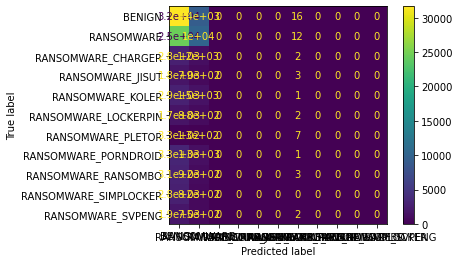

[[32036  9008     0     0     0     0    11     0     0     0     0]
 [25063  9807     0     0     0     0    24     0     0     0     0]
 [ 2562  1393     0     0     0     0     0     0     0     0     0]
 [ 1690   874     0     0     0     0     3     0     0     0     0]
 [ 2277  2175     0     0     0     0     4     0     0     0     0]
 [ 1622   907     0     0     0     0     2     0     0     0     0]
 [  314   151     0     0     0     0     6     0     0     0     0]
 [ 3154  1448     0     0     0     0     6     0     0     0     0]
 [ 3038   946     0     0     0     0     2     0     0     0     0]
 [ 2799   834     0     0     0     0     1     0     0     0     0]
 [ 1997   700     0     0     0     0     3     0     0     0     0]]


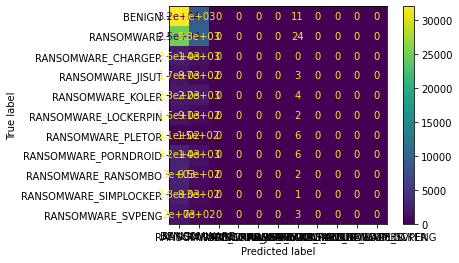

[[32764  8282     0     0     0     0     9     0     0     0     0]
 [26676  8206     0     0     0     0    12     0     0     0     0]
 [ 2621  1333     0     0     0     0     1     0     0     0     0]
 [ 1763   803     0     0     0     0     1     0     0     0     0]
 [ 3421  1035     0     0     0     0     0     0     0     0     0]
 [ 1537   992     0     0     0     0     1     0     0     0     0]
 [  327   137     0     0     0     0     8     0     0     0     0]
 [ 3359  1249     0     0     0     0     0     0     0     0     0]
 [ 3071   914     0     0     0     0     1     0     0     0     0]
 [ 2836   797     0     0     0     0     1     0     0     0     0]
 [ 1843   857     0     0     0     0     0     0     0     0     0]]


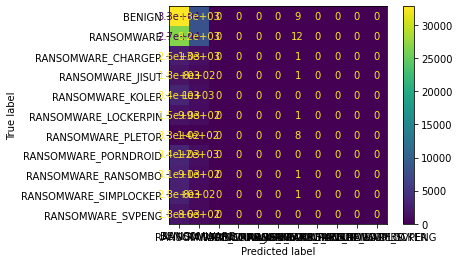

[[32872  8176     0     0     0     0     7     0     0     0     0]
 [25638  9214     0     0     0     0    42     0     0     0     0]
 [ 2809  1143     0     0     0     0     3     0     0     0     0]
 [ 1791   773     0     0     0     0     3     0     0     0     0]
 [ 2917  1536     0     0     0     0     3     0     0     0     0]
 [ 1793   731     0     0     0     0     6     0     0     0     0]
 [  346   123     0     0     0     0     3     0     0     0     0]
 [ 3086  1516     0     0     0     0     6     0     0     0     0]
 [ 3221   762     0     0     0     0     3     0     0     0     0]
 [ 2765   867     0     0     0     0     2     0     0     0     0]
 [ 2004   692     0     0     0     0     4     0     0     0     0]]


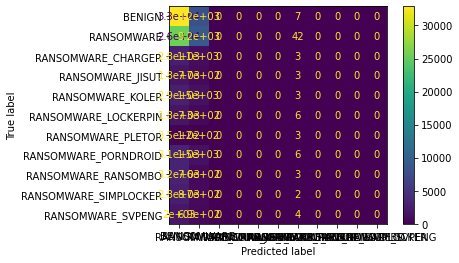

[[33745  7306     0     0     0     0     3     0     0     0     0]
 [24915  9955     0     0     0     0    25     0     0     0     0]
 [ 2900  1055     0     0     0     0     0     0     0     0     0]
 [ 1837   730     0     0     0     0     0     0     0     0     0]
 [ 2957  1499     0     0     0     0     0     0     0     0     0]
 [ 1797   733     0     0     0     0     0     0     0     0     0]
 [  310   152     0     0     0     0    10     0     0     0     0]
 [ 2977  1628     0     0     0     0     3     0     0     0     0]
 [ 3326   659     0     0     0     0     1     0     0     0     0]
 [ 2922   711     0     0     0     0     1     0     0     0     0]
 [ 2023   677     0     0     0     0     0     0     0     0     0]]


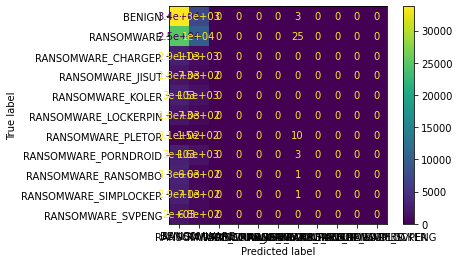

[[33649  7403     0     0     0     0     2     0     0     0     0]
 [28823  6070     0     0     0     0     2     0     0     0     0]
 [ 2829  1126     0     0     0     0     0     0     0     0     0]
 [ 1895   672     0     0     0     0     0     0     0     0     0]
 [ 3009  1446     0     0     0     0     0     0     0     0     0]
 [ 1803   728     0     0     0     0     0     0     0     0     0]
 [  369   103     0     0     0     0     0     0     0     0     0]
 [ 3015  1592     0     0     0     0     1     0     0     0     0]
 [ 3208   777     0     0     0     0     1     0     0     0     0]
 [ 2584  1050     0     0     0     0     0     0     0     0     0]
 [ 2090   610     0     0     0     0     0     0     0     0     0]]


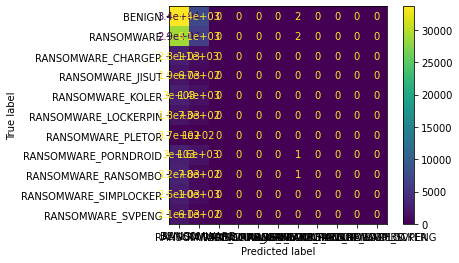

 Accuracy: 0.89083607636603028


In [ ]:

skf = StratifiedKFold(n_splits=3)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = GradientBoostingClassifier(n_estimators = 50, random_state = 0)
  classifier.fit(x_train, y_train)
  while z>0:
   continue;
        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print(" Accuracy: " + accuracy.__str__())





[[115114  21565     67      8     52      0     44      0      0      0
       0]
 [ 79301  31821   1433     21   3483      0    255      0      0      0
       0]
 [  9253   3570    332      0      2      0     27      0      0      0
       0]
 [  6389   2141      0      0      2      0     25      0      0      0
       0]
 [ 10936   3841      1      1     24      0     49      0      0      0
       0]
 [  5597   2807      0      0      1      0     30      0      0      0
       0]
 [   650    571      0      0      0      0    351      0      0      0
       0]
 [ 10725   4607      3      0      4      0     22      0      0      0
       0]
 [  8500   4755     17      0      2      0     12      0      0      0
       0]
 [  8002   4093      6      0      2      0      9      1      0      0
       0]
 [  5786   3201      6      0      4      0      3      0      0      0
       1]]


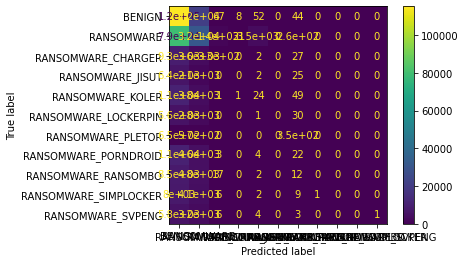

[[114693  22055      0      0      0      4     87      8      2      0
       0]
 [ 78393  35498      0      0      0     18   1743    596     43     24
       0]
 [  7918   5207      0      0      0      0     49      6      3      0
       0]
 [  5679   2844      0      0      0      0     29      6      0      0
       0]
 [  7131   7692      0      0      0      0     26      2      0      0
       0]
 [  5255   3170      0      0      0      0      6      5      0      0
       0]
 [   611    392      0      0      0      0    565      4      0      0
       0]
 [ 10765   4540      0      0      0      2     39     14      0      0
       0]
 [  9970   3296      0      0      0      2     12      0      6      1
       0]
 [  8701   3389      0      0      0      0     15      2      6      0
       0]
 [  6251   2739      0      0      0      0      8      3      0      0
       0]]


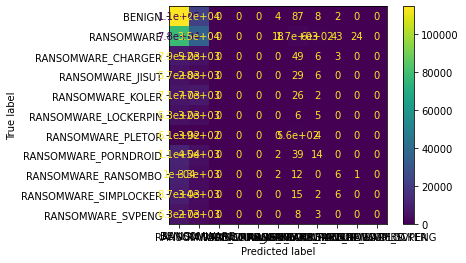

[[114182  22569      0      0     14      0     22      0      0      0
      62]
 [ 83859  31883      0      0      9      0     19      0      0     12
     532]
 [  7974   5150     58      0      1      0      1      0      0      0
       0]
 [  5361   3193      0      0      0      0      3      0      0      0
       0]
 [  8169   6675      0      0      0      0      5      0      0      0
       3]
 [  5213   3220      0      0      0      0      1      0      0      0
       2]
 [   711    787      0      0      0      0     71      0      0      0
       2]
 [  8945   6367      0      0      0      0      4     39      0      0
       6]
 [ 10021   3257      0      0      2      0      5      0      0      0
       1]
 [  8370   3715      0      0      0      0      3      0      0      0
      26]
 [  6608   2321      0      0      4      0      2      0      0      0
      66]]


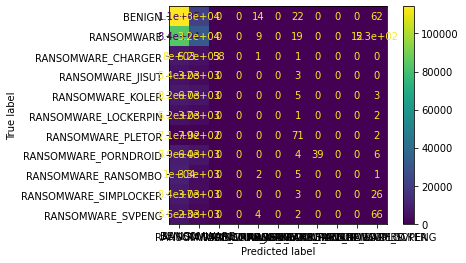

 Accuracy: 0.89882746316607196


In [ ]:
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

        # create and fit classifier
  classifier = AdaBoostClassifier(n_estimators = 50, random_state = 0)
  classifier.fit(x_train, y_train)
  while z>0:
   continue;
        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print(" Accuracy: " + accuracy.__str__())


[[96904 34684  1664   975  1645   131    23   370   194   177    83]
 [21348 16359 28446 18335 31401    84    15   190    57    44    35]
 [ 6532  4940   822   272   497    18     3    57    25    11     7]
 [ 4303  3285   344   272   275    21     6    23    16     4     8]
 [ 7585  5290   690   501   646    28     5    71    12    14    10]
 [ 2887  4728   249   188   300    16     1    37     4    15    10]
 [    0  1572     0     0     0     0     0     0     0     0     0]
 [    4 15356     0     0     1     0     0     0     0     0     0]
 [    8 13278     0     0     0     0     0     0     0     0     0]
 [    6 12107     0     0     0     0     0     0     0     0     0]
 [    2  8999     0     0     0     0     0     0     0     0     0]]


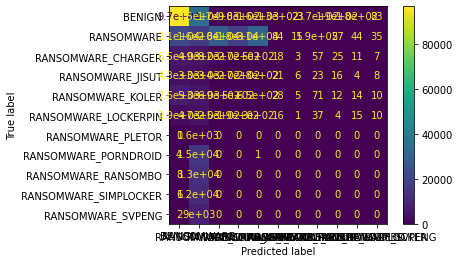

[[99020 32407   190    95   235   628   130  2111  1469   439   125]
 [17109 16902   104    49   107 10643  3809 32892 27581  7080    39]
 [    8 13175     0     0     0     0     0     0     0     0     0]
 [    3  8554     0     0     0     1     0     0     0     0     0]
 [    2 14847     0     0     0     1     0     1     0     0     0]
 [ 3518  4220    24     8    26   119     8   355   134    19     5]
 [  355   521     0     3     1    11   613    34    25     2     7]
 [ 6600  6578    58    26    54   150    35  1597   207    44    11]
 [ 6588  5558    21    11    26    38    19   200   674   136    16]
 [    7 12104     0     0     0     1     1     0     0     0     0]
 [    4  8997     0     0     0     0     0     0     0     0     0]]


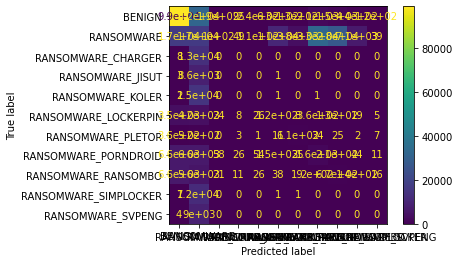

[[103790  29045    174    100    168    119     64    211    310   1204
    1664]
 [ 44564  29698     80     42    110    101     76    130    516  19618
   21379]
 [    10  13174      0      0      0      0      0      0      0      0
       0]
 [     4   8553      0      0      0      0      0      0      0      0
       0]
 [     6  14845      0      0      0      0      0      0      0      0
       1]
 [     3   8433      0      0      0      0      0      0      0      0
       0]
 [     0   1571      0      0      0      0      0      0      0      0
       0]
 [     5  15356      0      0      0      0      0      0      0      0
       0]
 [     8  13278      0      0      0      0      0      0      0      0
       0]
 [  6426   4760     10      4     11     13      5     25    104    510
     246]
 [  5100   3025     10      2     17     14      8     20     39    104
     662]]


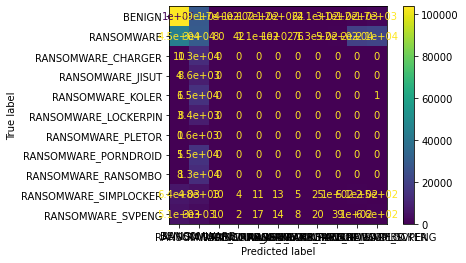

 Accuracy: 0.91379978669896905


In [ ]:
skf = StratifiedKFold(n_splits=3)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

        # create and fit classifier
  classifier = BaggingClassifier(n_estimators = 50, random_state = 0)
  classifier.fit(x_train, y_train)
  while z>0:
   continue;
        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print(" Accuracy: " + accuracy.__str__())



In [ ]:
  # Technique from https://machinelearningmastery.com/feature-selection-machine-learning-python/
# feature extraction
test = SelectFpr(score_func=f_classif, alpha=0.05)
fit = test.fit(X1, y)
# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
dictt = []
i=0
for col in X1.columns:
    score = fit.scores_[i]
    #print(score)
    i+=1
    if not math.isnan(float(score)):
        dictt.append([col, score])    
    
#dictt = sorted(dictt, key=operator.itemgetter(1), reverse=True)
dictt.sort(key=lambda arr : float(arr[1]), reverse=True)

outstr = ''

i=1
for col, score in dictt[:15]:
    #if not math.isnan(float(score)):
    print('{}\t{}\t{}'.format(i, col, score))
    i+=1
    
    outstr += '\'' + col + '\', '

print(outstr)


1	Active Max	677.6000614382294
2	Destination Port	617.1654480819002
3	Active Std	531.3617253049655
4	Active Mean	487.7271720509815
5	Init_Win_bytes_backward	466.4327605491759
6	URG Flag Count	446.0371823679936
7	Total Length of Fwd Packets	406.4139291026289
8	Fwd Header Length.1	406.4139291026289
9	Source Port	397.7716672219904
10	Flow IAT Mean	370.94468404250125
11	Flow IAT Min	289.4728599246458
12	Fwd IAT Total	287.69516928161494
13	Active Min	275.8639691756266
14	Fwd IAT Max	244.84775107860798
15	Fwd IAT Mean	243.04861113906384
'Active Max', 'Destination Port', 'Active Std', 'Active Mean', 'Init_Win_bytes_backward', 'URG Flag Count', 'Total Length of Fwd Packets', 'Fwd Header Length.1', 'Source Port', 'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Total', 'Active Min', 'Fwd IAT Max', 'Fwd IAT Mean', 


In [ ]:
cols_to_keep = ['Active Max', 'Destination Port', 'Active Std', 'Active Mean', 'Init_Win_bytes_backward', 'URG Flag Count', 'Total Length of Fwd Packets', 'Fwd Header Length.1', 'Source Port', 'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Total', 'Active Min', 'Fwd IAT Max', 'Fwd IAT Mean',  
                    'Label']
print('Dropping unnecessary columns...')
df1.drop(columns=[col for col in df1.columns if col not in cols_to_keep], inplace=True, errors='raise') 
df1.dropna(inplace=True)

Dropping unnecessary columns...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Source Port                  1048575 non-null  int64  
 1   Destination Port             1048575 non-null  int64  
 2   Total Length of Fwd Packets  1048575 non-null  int64  
 3   Flow IAT Mean                1048575 non-null  float64
 4   Flow IAT Min                 1048575 non-null  int64  
 5   Fwd IAT Total                1048575 non-null  int64  
 6   Fwd IAT Mean                 1048575 non-null  float64
 7   Fwd IAT Max                  1048575 non-null  int64  
 8   URG Flag Count               1048575 non-null  int64  
 9   Fwd Header Length.1          1048575 non-null  int64  
 10  Init_Win_bytes_backward      1048575 non-null  int64  
 11  Active Mean                  1048575 non-null  float64
 12  Active Std                   1048575 non-n

[[67104 14979     0     0     0     0    27     0     0     0     0]
 [49700 20016     0     0     0     0    73     0     0     0     0]
 [ 5401  2502     0     0     0     0     7     0     0     0     0]
 [ 3736  1388     0     0     0     0    10     0     0     0     0]
 [ 6031  2872     0     0     0     0     8     0     0     0     0]
 [ 3438  1618     0     0     0     0     6     0     0     0     0]
 [  678   257     0     0     0     0     8     0     0     0     0]
 [ 6527  2680     0     0     0     0     9     0     0     0     0]
 [ 6145  1817     0     0     0     0    10     0     0     0     0]
 [ 5457  1803     0     0     0     0     8     0     0     0     0]
 [ 3489  1905     0     0     0     0     6     0     0     0     0]]


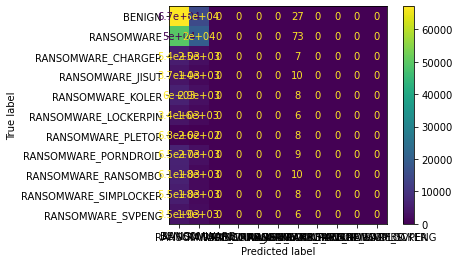

[[64274 17819     0     0     0     0    17     0     0     0     0]
 [46806 22967     0     0     0     0    15     0     0     0     0]
 [ 5478  2430     0     0     0     0     3     0     0     0     0]
 [ 3766  1366     0     0     0     0     2     0     0     0     0]
 [ 5962  2948     0     0     0     0     1     0     0     0     0]
 [ 3155  1906     0     0     0     0     0     0     0     0     0]
 [  673   268     0     0     0     0     2     0     0     0     0]
 [ 6271  2946     0     0     0     0     0     0     0     0     0]
 [ 5876  2091     0     0     0     0     5     0     0     0     0]
 [ 5250  2014     0     0     0     0     4     0     0     0     0]
 [ 3719  1681     0     0     0     0     0     0     0     0     0]]


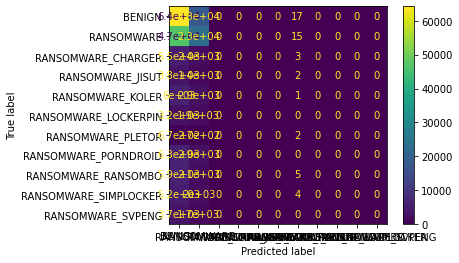

[[66482 15615     0     0     0     0    13     0     0     0     0]
 [51293 18463     0     0     0     0    32     0     0     0     0]
 [ 5639  2269     0     0     0     0     2     0     0     0     0]
 [ 3651  1480     0     0     0     0     4     0     0     0     0]
 [ 5643  3267     0     0     0     0     1     0     0     0     0]
 [ 3525  1533     0     0     0     0     3     0     0     0     0]
 [  647   296     0     0     0     0     0     0     0     0     0]
 [ 6719  2495     0     0     0     0     3     0     0     0     0]
 [ 6538  1430     0     0     0     0     3     0     0     0     0]
 [ 5835  1431     0     0     0     0     2     0     0     0     0]
 [ 3968  1432     0     0     0     0     1     0     0     0     0]]


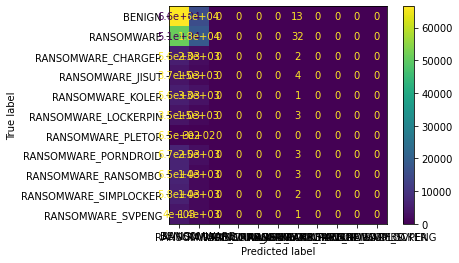

[[65581 16522     0     0     0     0     6     0     0     0     0]
 [53364 16414     0     0     0     0    11     0     0     0     0]
 [ 5293  2617     0     0     0     0     0     0     0     0     0]
 [ 3433  1702     0     0     0     0     0     0     0     0     0]
 [ 6144  2765     0     0     0     0     2     0     0     0     0]
 [ 3125  1934     0     0     0     0     2     0     0     0     0]
 [  628   308     0     0     0     0     7     0     0     0     0]
 [ 6324  2892     0     0     0     0     0     0     0     0     0]
 [ 6503  1468     0     0     0     0     1     0     0     0     0]
 [ 5751  1517     0     0     0     0     0     0     0     0     0]
 [ 3832  1565     0     0     0     0     4     0     0     0     0]]


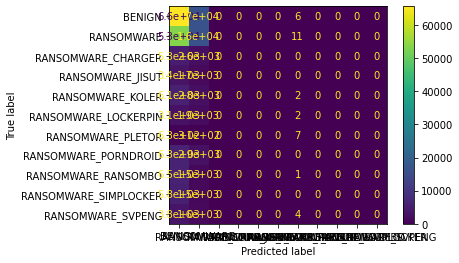

[[65794 16213     0     0     0     0   102     0     0     0     0]
 [50930 18799     0     0     0     0    60     0     0     0     0]
 [ 5309  2598     0     0     0     0     3     0     0     0     0]
 [ 3516  1616     0     0     0     0     2     0     0     0     0]
 [ 5579  3330     0     0     0     0     2     0     0     0     0]
 [ 3289  1770     0     0     0     0     3     0     0     0     0]
 [  635   288     0     0     0     0    20     0     0     0     0]
 [ 5477  3734     0     0     0     0     5     0     0     0     0]
 [ 6208  1760     0     0     0     0     4     0     0     0     0]
 [ 5189  2076     0     0     0     0     3     0     0     0     0]
 [ 4010  1387     0     0     0     0     4     0     0     0     0]]


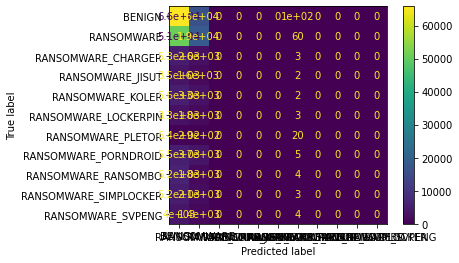

 Accuracy: 0.90653846660258858


In [ ]:
skf = StratifiedKFold(n_splits=5)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

        # create and fit classifier
  classifier = AdaBoostClassifier(n_estimators = 50, random_state = 0)
  classifier.fit(x_train, y_train)
  while z>0:
   continue;
        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print(" Accuracy: " + accuracy.__str__())



[[116035  20647     28     11     81      0     48      0      0      0
       0]
 [ 69778  40416   1473     62   4277     14    294      0      0      0
       0]
 [  8308   4486    333      0     12     14     31      0      0      0
       0]
 [  5680   2845      0      0      3      0     29      0      0      0
       0]
 [  9633   5134      6      8     25      0     46      0      0      0
       0]
 [  4902   3491      8      0      4      0     30      0      0      0
       0]
 [   498    648      3      0      0      0    423      0      0      0
       0]
 [  9567   5755      2      0     13      0     24      0      0      0
       0]
 [  8072   5183      4      0     15      0     12      0      0      0
       0]
 [  7472   4607     10      0     12      0     12      0      0      0
       0]
 [  5276   3705      4      0     11      0      5      0      0      0
       0]]


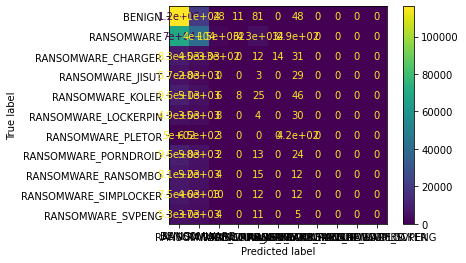

[[115557  21234      0      0      0      2     47      9      0      0
       0]
 [ 72480  41312      0      0      0     68   1760    614     60     21
       0]
 [  7887   5243      0      0      0      0     47      6      0      0
       0]
 [  5133   3393      0      0      0      0     26      6      0      0
       0]
 [  6858   7968      0      0      0      0     22      3      0      0
       0]
 [  5005   3418      0      0      0      4      6      3      0      0
       0]
 [   560    434      0      0      0      0    574      4      0      0
       0]
 [  9295   6016      0      0      0      0     42      7      0      0
       0]
 [  9406   3864      0      0      0      0     13      0      3      1
       0]
 [  8165   3933      0      0      0      0     10      2      3      0
       0]
 [  5601   3392      0      0      0      0      5      3      0      0
       0]]


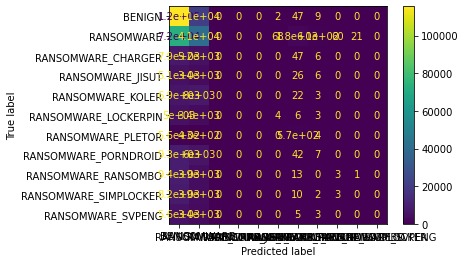

[[117114  19625      0      0      9      0     53      0      0      4
      44]
 [ 77980  36998      0      0      5      0    103      0     53    224
     951]
 [  7951   5230      0      0      0      0      2      0      0      0
       1]
 [  4936   3616      0      0      0      0      5      0      0      0
       0]
 [  7928   6923      0      0      0      0      0      0      0      0
       1]
 [  4897   3537      0      0      0      0      1      0      0      0
       1]
 [   554    903      0      0      0      0    108      0      0      3
       3]
 [  8823   6473      0      0      2      0      7     52      0      0
       4]
 [  9201   4059      0      0      2      0      3      0      4     12
       5]
 [  7897   4153      0      0      0      0      4      0     10     13
      37]
 [  6311   2558      0      0      0      0      8      0     11      3
     110]]


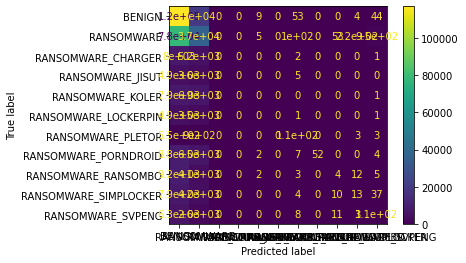

 Accuracy: 0.90656480006320031


In [ ]:
skf = StratifiedKFold(n_splits=3)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

        # create and fit classifier
  classifier = GradientBoostingClassifier(n_estimators = 50, random_state = 0)
  classifier.fit(x_train, y_train)
  while z>0:
   continue;
        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print(" Accuracy: " + accuracy.__str__())



[[104028  28287   1389    839   1496    126     11    301    174    129
      70]
 [ 16711  19091  29054  18834  32093    117     13    283     40     46
      32]
 [  5080   5847   1076    350    681     28      1     88     10     15
       8]
 [  3339   3860    459    410    377     23      6     58      7     11
       7]
 [  6053   6160    812    726    919     35      5     97     18     18
       9]
 [  2199   5115    358    243    437     30      1     38      5      1
       8]
 [     0   1572      0      0      0      0      0      0      0      0
       0]
 [     4  15356      0      0      1      0      0      0      0      0
       0]
 [     5  13281      0      0      0      0      0      0      0      0
       0]
 [     5  12108      0      0      0      0      0      0      0      0
       0]
 [     1   9000      0      0      0      0      0      0      0      0
       0]]


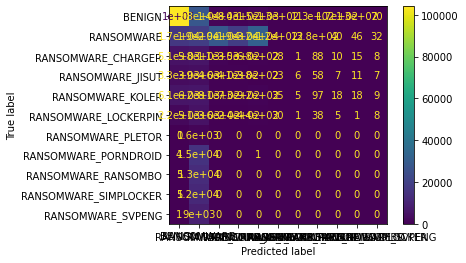

[[106303  25843    159    106    186    566    106   1775   1322    395
      88]
 [ 13355  19853    109     55     98  10741   3867  33243  27831   7122
      41]
 [     7  13176      0      0      0      0      0      0      0      0
       0]
 [     2   8555      0      0      0      0      0      1      0      0
       0]
 [     1  14849      0      0      0      0      0      1      0      0
       0]
 [  2788   4850     15     18     29    145      8    419    121     31
      12]
 [   254    572      2      0      0     13    649     40     36      2
       4]
 [  5077   7636     65     28     49    207     59   1901    272     52
      14]
 [  5192   6771     26      7     20     49     17    178    862    154
      11]
 [     3  12110      0      0      0      0      0      0      0      0
       0]
 [     3   8998      0      0      0      0      0      0      0      0
       0]]


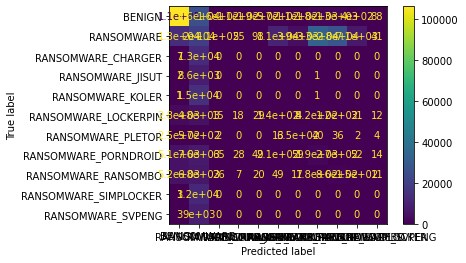

[[110490  23005    107     64    110     67     73    169    281   1069
    1414]
 [ 34448  35751     98     72    104     65     76    143    697  20768
   24092]
 [     9  13175      0      0      0      0      0      0      0      0
       0]
 [     4   8553      0      0      0      0      0      0      0      0
       0]
 [     2  14850      0      0      0      0      0      0      0      0
       0]
 [     5   8431      0      0      0      0      0      0      0      0
       0]
 [     0   1571      0      0      0      0      0      0      0      0
       0]
 [     8  15353      0      0      0      0      0      0      0      0
       0]
 [    12  13274      0      0      0      0      0      0      0      0
       0]
 [  4938   5805     17      5     13      7      5     13    156    719
     436]
 [  3930   3599     18      5     13      6     11     25     58    202
    1134]]


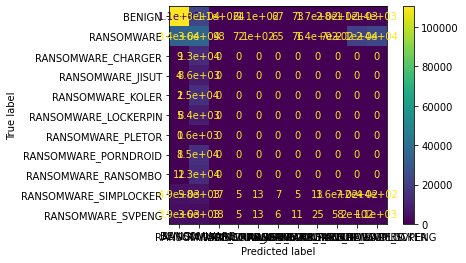

 Accuracy: 0.91945543720127981


In [ ]:
skf = StratifiedKFold(n_splits=3)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

        # create and fit classifier
  classifier = BaggingClassifier(n_estimators = 50, random_state = 0)
  classifier.fit(x_train, y_train)
  while z>0:
   continue;
        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print(" Accuracy: " + accuracy.__str__())



In [ ]:
# Technique from https://machinelearningmastery.com/feature-selection-machine-learning-python/
# feature extraction
test = SelectFpr(score_func=f_classif, alpha=0.05)
fit = test.fit(X2, y)
# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
dictt = []
i=0
for col in X2.columns:
    score = fit.scores_[i]
    #print(score)
    i+=1
    if not math.isnan(float(score)):
        dictt.append([col, score])    
    
#dictt = sorted(dictt, key=operator.itemgetter(1), reverse=True)
dictt.sort(key=lambda arr : float(arr[1]), reverse=True)

outstr = ''

i=1
for col, score in dictt[:10]:
    #if not math.isnan(float(score)):
    print('{}\t{}\t{}'.format(i, col, score))
    i+=1
    
    outstr += '\'' + col + '\', '

print(outstr)


1	Active Max	677.6000614382294
2	Destination Port	617.1654480819002
3	Active Std	531.3617253049655
4	Active Mean	487.7271720509815
5	Init_Win_bytes_backward	466.4327605491759
6	URG Flag Count	446.0371823679936
7	Total Length of Fwd Packets	406.4139291026289
8	Fwd Header Length.1	406.4139291026289
9	Source Port	397.7716672219904
10	Flow IAT Mean	370.94468404250125
'Active Max', 'Destination Port', 'Active Std', 'Active Mean', 'Init_Win_bytes_backward', 'URG Flag Count', 'Total Length of Fwd Packets', 'Fwd Header Length.1', 'Source Port', 'Flow IAT Mean', 


In [ ]:
cols_to_keep = ['Active Max', 'Destination Port', 'Active Std', 'Active Mean', 'Init_Win_bytes_backward', 'URG Flag Count', 'Total Length of Fwd Packets', 'Fwd Header Length.1', 'Source Port', 'Flow IAT Mean', 
                    'Label']
print('Dropping unnecessary columns...')
df2.drop(columns=[col for col in df2.columns if col not in cols_to_keep], inplace=True, errors='raise') 
df2.dropna(inplace=True)

Dropping unnecessary columns...


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Source Port                  1048575 non-null  int64  
 1   Destination Port             1048575 non-null  int64  
 2   Total Length of Fwd Packets  1048575 non-null  int64  
 3   Flow IAT Mean                1048575 non-null  float64
 4   URG Flag Count               1048575 non-null  int64  
 5   Fwd Header Length.1          1048575 non-null  int64  
 6   Init_Win_bytes_backward      1048575 non-null  int64  
 7   Active Mean                  1048575 non-null  float64
 8   Active Std                   1048575 non-null  float64
 9   Active Max                   1048575 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 88.0 MB


[[64227 17854     0     0     0     0    29     0     0     0     0]
 [45536 24141     0     0     0     0   112     0     0     0     0]
 [ 5276  2621     0     0     0     0    13     0     0     0     0]
 [ 3404  1726     0     0     0     0     4     0     0     0     0]
 [ 5751  3139     0     0     0     0    21     0     0     0     0]
 [ 3275  1783     0     0     0     0     4     0     0     0     0]
 [  247   674     0     0     0     0    11     0    11     0     0]
 [ 6185  3024     0     0     0     0     7     0     0     0     0]
 [ 5636  2324     0     0     0     0     5     0     7     0     0]
 [ 4655  2594     0     0     0     0     8     0    11     0     0]
 [ 3043  2346     0     0     0     0    11     0     0     0     0]]


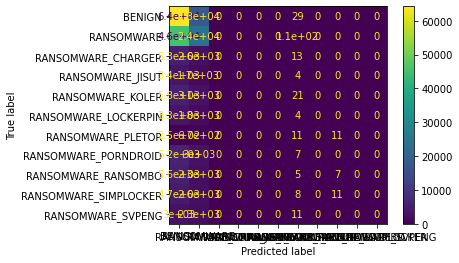

[[68879 13164     0     0     0     0    67     0     0     0     0]
 [44228 25289     0     0     0     0   271     0     0     0     0]
 [ 5394  2497     0     0     0     0    20     0     0     0     0]
 [ 3781  1338     0     0     0     0    15     0     0     0     0]
 [ 5844  3060     0     0     0     0     7     0     0     0     0]
 [ 3173  1877     0     0     0     0    11     0     0     0     0]
 [  586   333     0     0     0     0    24     0     0     0     0]
 [ 6718  2490     0     0     0     0     9     0     0     0     0]
 [ 5825  2140     0     0     0     0     7     0     0     0     0]
 [ 5425  1829     0     0     0     0    14     0     0     0     0]
 [ 3495  1890     0     0     0     0    15     0     0     0     0]]


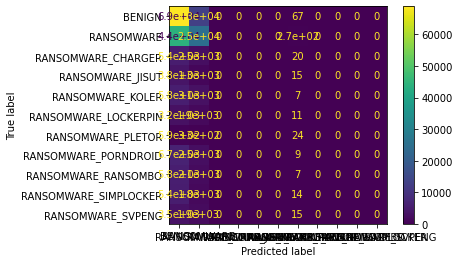

[[65514 16564     0     0     0     0    32     0     0     0     0]
 [47857 21850     0     0     0     0    81     0     0     0     0]
 [ 4964  2936     0     0     0     0    10     0     0     0     0]
 [ 3185  1930     0     0     0     0    20     0     0     0     0]
 [ 5397  3497     0     0     0     0    17     0     0     0     0]
 [ 3134  1917     0     0     0     0    10     0     0     0     0]
 [  560   376     0     0     0     0     7     0     0     0     0]
 [ 6510  2697     0     0     0     0    10     0     0     0     0]
 [ 5917  2050     0     0     0     0     4     0     0     0     0]
 [ 5201  2057     0     0     0     0    10     0     0     0     0]
 [ 3504  1890     0     0     0     0     7     0     0     0     0]]


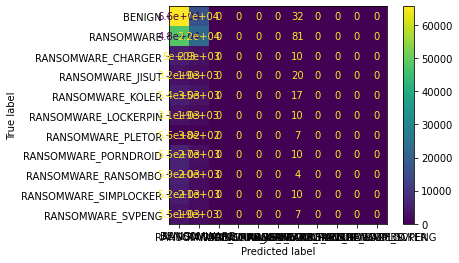

[[61804 20275     0     0     0     0    30     0     0     0     0]
 [45134 24123     0     0     0     0    67     0   328   137     0]
 [ 4963  2941     0     0     0     0     6     0     0     0     0]
 [ 2807  2316     0     0     0     0    12     0     0     0     0]
 [ 3788  5121     0     0     0     0     2     0     0     0     0]
 [ 2787  2255     0     0     0     0    19     0     0     0     0]
 [  269   672     0     0     0     0     0     0     1     1     0]
 [ 4692  4511     0     0     0     0    13     0     0     0     0]
 [ 5502  2426     0     0     0     0     0     0    29    15     0]
 [ 4994  2192     0     0     0     0     4     0    61    17     0]
 [ 3214  2153     0     0     0     0     0     0    24    10     0]]


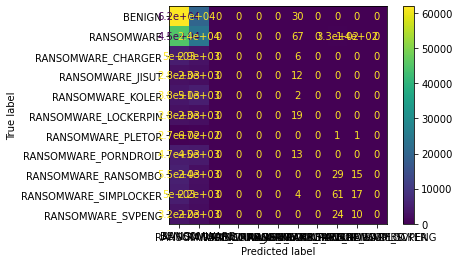

[[65844 16225     0     0     0     0    40     0     0     0     0]
 [48841 20880     0     0     0     0    68     0     0     0     0]
 [ 5553  2348     0     0     0     0     9     0     0     0     0]
 [ 3422  1706     0     0     0     0     6     0     0     0     0]
 [ 5895  3009     0     0     0     0     7     0     0     0     0]
 [ 3526  1527     0     0     0     0     9     0     0     0     0]
 [  419   511     0     0     0     0    13     0     0     0     0]
 [ 6143  3068     0     0     0     0     5     0     0     0     0]
 [ 5882  2083     0     0     0     0     7     0     0     0     0]
 [ 4955  2307     0     0     0     0     6     0     0     0     0]
 [ 4056  1343     0     0     0     0     2     0     0     0     0]]


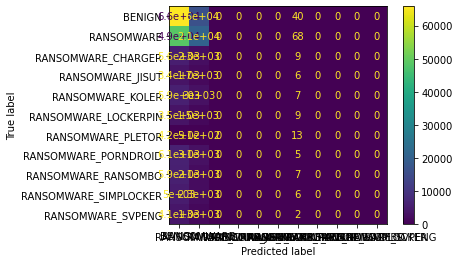

 Accuracy: 0.89145543720127981


In [ ]:
skf = StratifiedKFold(n_splits=5)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

        # create and fit classifier
  classifier = AdaBoostClassifier(n_estimators = 50, random_state = 0)
  classifier.fit(x_train, y_train)
  while z>0:
   continue;
        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print(" Accuracy: " + accuracy.__str__())



In [ ]:
skf = StratifiedKFold(n_splits=3)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

        # create and fit classifier
  classifier = GradientBoostingClassifier(n_estimators = 50, random_state = 0)
  classifier.fit(x_train, y_train)
  while z>0:
   continue;
        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print(" Accuracy: " + accuracy.__str__())



[[104028  28287   1389    839   1496    126     11    301    174    129
      70]
 [ 16711  19091  29054  18834  32093    117     13    283     40     46
      32]
 [  5080   5847   1076    350    681     28      1     88     10     15
       8]
 [  3339   3860    459    410    377     23      6     58      7     11
       7]
 [  6053   6160    812    726    919     35      5     97     18     18
       9]
 [  2199   5115    358    243    437     30      1     38      5      1
       8]
 [     0   1572      0      0      0      0      0      0      0      0
       0]
 [     4  15356      0      0      1      0      0      0      0      0
       0]
 [     5  13281      0      0      0      0      0      0      0      0
       0]
 [     5  12108      0      0      0      0      0      0      0      0
       0]
 [     1   9000      0      0      0      0      0      0      0      0
       0]]


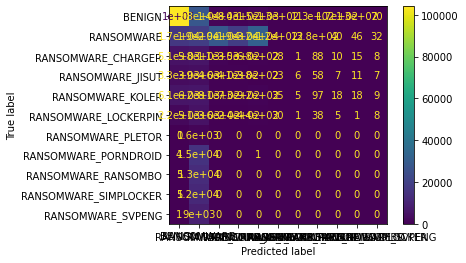

[[106303  25843    159    106    186    566    106   1775   1322    395
      88]
 [ 13355  19853    109     55     98  10741   3867  33243  27831   7122
      41]
 [     7  13176      0      0      0      0      0      0      0      0
       0]
 [     2   8555      0      0      0      0      0      1      0      0
       0]
 [     1  14849      0      0      0      0      0      1      0      0
       0]
 [  2788   4850     15     18     29    145      8    419    121     31
      12]
 [   254    572      2      0      0     13    649     40     36      2
       4]
 [  5077   7636     65     28     49    207     59   1901    272     52
      14]
 [  5192   6771     26      7     20     49     17    178    862    154
      11]
 [     3  12110      0      0      0      0      0      0      0      0
       0]
 [     3   8998      0      0      0      0      0      0      0      0
       0]]


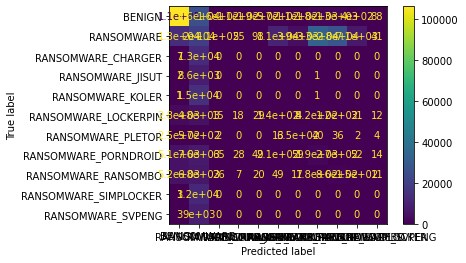

[[110490  23005    107     64    110     67     73    169    281   1069
    1414]
 [ 34448  35751     98     72    104     65     76    143    697  20768
   24092]
 [     9  13175      0      0      0      0      0      0      0      0
       0]
 [     4   8553      0      0      0      0      0      0      0      0
       0]
 [     2  14850      0      0      0      0      0      0      0      0
       0]
 [     5   8431      0      0      0      0      0      0      0      0
       0]
 [     0   1571      0      0      0      0      0      0      0      0
       0]
 [     8  15353      0      0      0      0      0      0      0      0
       0]
 [    12  13274      0      0      0      0      0      0      0      0
       0]
 [  4938   5805     17      5     13      7      5     13    156    719
     436]
 [  3930   3599     18      5     13      6     11     25     58    202
    1134]]


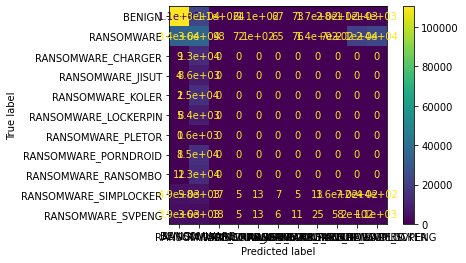

 Accuracy: 0.90175654715664459


In [ ]:
skf = StratifiedKFold(n_splits=3)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

        # create and fit classifier
  classifier = BaggingClassifier(n_estimators = 50, random_state = 0)
  classifier.fit(x_train, y_train)
  while z>0:
   continue;
        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print(" Accuracy: " + accuracy.__str__())

